In [5]:
# #PipeLine:::

# A machine learning pipeline is like a coffee machine:

# You put in raw ingredients (coffee beans, water, milk), and the machine:
#
# Grinds the beans
#
# Boils the water
#
# Mixes everything
#
# Pours out ready-to-drink coffee
#
# You just press one button — it handles all steps in order.
#
# 🔁 Similarly, in ML:
# You input raw data ➝ the pipeline fills missing values ➝ scales numbers ➝ trains the model ➝ gives predictions — all with one .fit() or .predict() command.
#
# ✅ It automates the full process, just like a coffee machine does for making coffee

In [6]:
#Preprocessing steps-Filling missing values--> Encoding categorical values--> Scaling Values so that no value can influence the model-->other steps-->train model

In [7]:
import numpy as np
import pandas as pd
from scipy.signal import tf2ss

In [8]:
df=pd.read_csv("../Assets/10 pipe dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
df.shape

(12316, 32)

In [10]:
df['Accident_severity'].value_counts()
#data is imbalancr as slight injury frequency is more

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

<Axes: xlabel='Educational_level'>

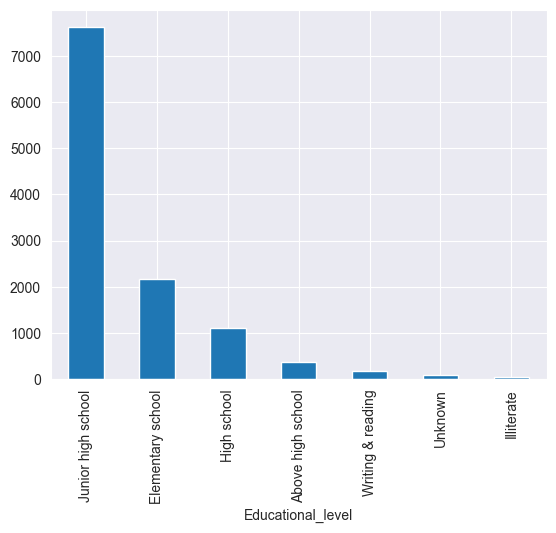

In [11]:
df.Educational_level.value_counts().plot(kind='bar')

In [12]:
df['Time']=pd.to_datetime(df['Time'])

C:\Users\risha\AppData\Local\Temp\ipykernel_1888\1282180885.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [13]:
df['Hour_of_Day']=df['Time'].dt.hour

In [14]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,2025-06-08 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,2025-06-08 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,2025-06-08 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,2025-06-08 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,2025-06-08 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [15]:
new_df=df.copy()

In [16]:
new_df.drop('Time',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
new_df['Accident_severity']=lb.fit_transform(new_df['Accident_severity'])

In [18]:
new_df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [19]:
#Balancing data
from imblearn.over_sampling import RandomOverSampler

X=new_df.drop("Accident_severity",axis=1)
y=new_df["Accident_severity"]

oversampler=RandomOverSampler(random_state=42)
X_resampled,y_resampled=oversampler.fit_resample(X,y)

In [20]:
X

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,13


In [21]:
y_resampled.value_counts()  #balanced data


Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

In [22]:
new_df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import  SimpleImputer

strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')

In [24]:
new_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,2,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,2,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,2,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,2,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,1,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,2,13


In [25]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the object columns indices
object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')



In [26]:
from sklearn.feature_selection import SelectKBest,chi2

tf4=SelectKBest(chi2, k=50)


In [27]:
from sklearn.ensemble import RandomForestClassifier
tf5=RandomForestClassifier()

In [29]:
from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ('trf1',tf1),
    ('trf2',tf2),
    ('trf4',tf4),
    ('trf5',tf5)
])

pipe.fit(X_tr)